#Đổi tên mọi variable
https://stackoverflow.com/questions/70356656/google-colab-change-variable-name-everywhere-in-code-cell

#Run all cell
https://stackoverflow.com/questions/46565739/how-would-i-make-this-work-n-in-a-filepath-not-intentional

For gg colab run

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#Library


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using pandas module in python to find the average baby weight in 
```
import pandas as pd
nsfg = pd.read_hdf('nsfg.hdf5','nsfg')
type(nsfg)

#Primary data stucture Pandas use to store data
```

For local VScode run

In [3]:
import pandas as pd
#nsfg = pd.read_hdf('/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/nsfg.hdf5','nsfg')
nsfg = pd.read_hdf(r'D:\sem 2 year 3\DataCamp\Dataset\New folder\Google_Colab_DataCamp_Data_Analyst\Dataset_Exploratory Data Analysis in Python\nsfg.hdf5','nsfg')

type(nsfg)

pandas.core.frame.DataFrame

###Attribute của dataset

* .shape
* .columns

##Clean and validate

In [4]:
pounds = nsfg['birthwgt_lb1']

ounces = nsfg['birthwgt_oz1']

###Validate data: confirming data is interpreting correctly

theo mặc định, data sort theo giá trị nhiều nhất nên ở đây dùng `.sort_index()` để sort theo value

In [5]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

**ở trên ta có thể thấy phần lớn em bé nặng khảng 4-9, có vài em bé rất nhẹ và 98,99 nghĩa là missing data**

### validate the result bằng cách **comparing themn to the code book**
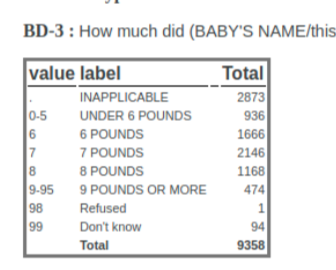

###1 cách nữa để validate: .decribe()

In [6]:
pounds.describe()
#Here the mean at 8.05 which does not mean much because of the special value(98,99) as outliner

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

Dùng replace vì 98 và 99 đại diện cho Refused & Dont know

In [7]:
pounds = pounds.replace([98,99], np.nan)
#mean of pounds will make more sense
pounds.mean()

6.703286384976526

###Bây giờ có thấy việc phải reassign giá trị khi dùng `.replace()`

To bypass this just use the inplace = True arg

In [8]:
ounces.replace([98,99], np.nan, inplace = True) 
#We didn't make a new series so we dont need to assign it back to ounces

###Arithmetic operator: Work with Series object

Để đổi từ ounces -> pounds: chia 16

In [9]:
birth_weight = pounds + ounces/16
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

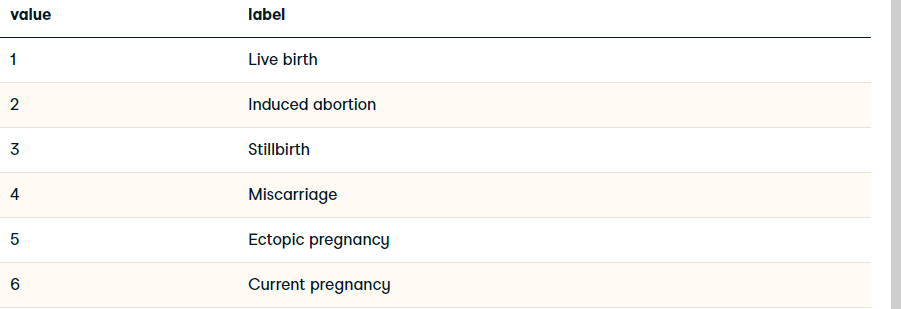

In [10]:
nsfg['outcome'].value_counts().sort_index()


1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

Clean a variable

In the NSFG dataset, the variable 'nbrnaliv' records the number of babies born alive at the end of a pregnancy.

If you use .value_counts() to view the responses, you'll see that the value 8 appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

Your job in this exercise is to replace this value with np.nan. Recall from the video how Allen replaced the values 98 and 99 in the ounces column using the .replace()

In [11]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


For each pregnancy in the NSFG dataset, the variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.

In [12]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


##Filter and visualize

###Histogram

In [13]:
import matplotlib.pyplot as plt
plt.hist(birth_wieght.dropna(),bins = 30)

NameError: name 'birth_wieght' is not defined

###Label

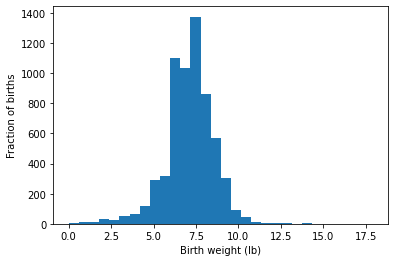

In [ ]:
plt.hist(birth_wieght.dropna(),bins = 30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show()

Time for pregnancy duration is : 39 weeks

* 'full term' = 39 weeks
* 'preterm' < 37 weeks


In [ ]:
preterm = nsfg['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [ ]:
# if we calculate sum() and mean() it will treat True = 1, False = 0
preterm.sum()
#3700 baby are preterm

3742

In [ ]:
preterm.mean()
#40% kids are preterm

0.39987176747168196

###Filtering


In [ ]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

Make a histogram

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's [Introduction to Data Visualization with Matplotlib](https://www.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib) course.

matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, **histtype='bar'**, align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)


histtype{'bar', 'barstacked', 'step', 'stepfilled'}, default: 'bar'

The type of histogram to draw.

'bar' is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side.

'barstacked' is a bar-type histogram where multiple data are stacked on top of each other.

'step' generates a lineplot that is by default unfilled.

'stepfilled' generates a lineplot that is by default filled.

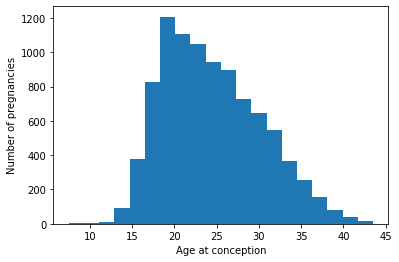

In [ ]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

Compute birth weight

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.
```
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16
```

In [ ]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


Filter

In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.

In [ ]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

Single full-term mean: 7.385643450184502


`~single` là phủ định

In [ ]:
# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Multiple full-term mean: 5.768055555555556


##Kết luận cân nặng trung bình của trẻ sơ sinh là:

sinh 1 đứa: 7.3 pounds và nhiều hơn 1 là 5.76

Ở đây có khoảng 40% trẻ là pretem: ko đủ tháng và kết quả ở trên là cho trẻ đủ tháng trở lên